In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# ---------------------------------------------------------
# 1. CARGA DE DATOS
# ---------------------------------------------------------
df = pd.read_csv(fr"C:\Users\xavir\OneDrive\Escritorio\vino.csv",)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [22]:
# ---------------------------------------------------------
# 2. DIVISIÓN Y ESCALADO
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# ---------------------------------------------------------
# 3. MODELO 1 - KNN
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [24]:
# ---------------------------------------------------------
# 4. MODELO 2 - Árbol de Decisión
# ---------------------------------------------------------
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)

In [25]:
# ---------------------------------------------------------
# 5. MODELO 3 - KMeans (no supervisado)
# ---------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Mapeo de clusters a clases verdaderas (mayoría)
train_clusters = pd.DataFrame({'cluster': kmeans.labels_, 'true': y_train})
cluster_to_class = (
    train_clusters.groupby('cluster')['true']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)

y_pred_kmeans_mapped = [cluster_to_class[c] for c in y_pred_kmeans]

acc_kmeans = accuracy_score(y_test, y_pred_kmeans_mapped)
cm_kmeans = confusion_matrix(y_test, y_pred_kmeans_mapped)

In [26]:
# ---------------------------------------------------------
# 6. RESULTADOS
# ---------------------------------------------------------
print("📊 RESULTADOS DE CLASIFICACIÓN")
print(f"KNN Accuracy: {acc_knn:.3f}")
print(f"Árbol de Decisión Accuracy: {acc_tree:.3f}")
print(f"KMeans Accuracy: {acc_kmeans:.3f}\n")

📊 RESULTADOS DE CLASIFICACIÓN
KNN Accuracy: 0.944
Árbol de Decisión Accuracy: 0.963
KMeans Accuracy: 0.944



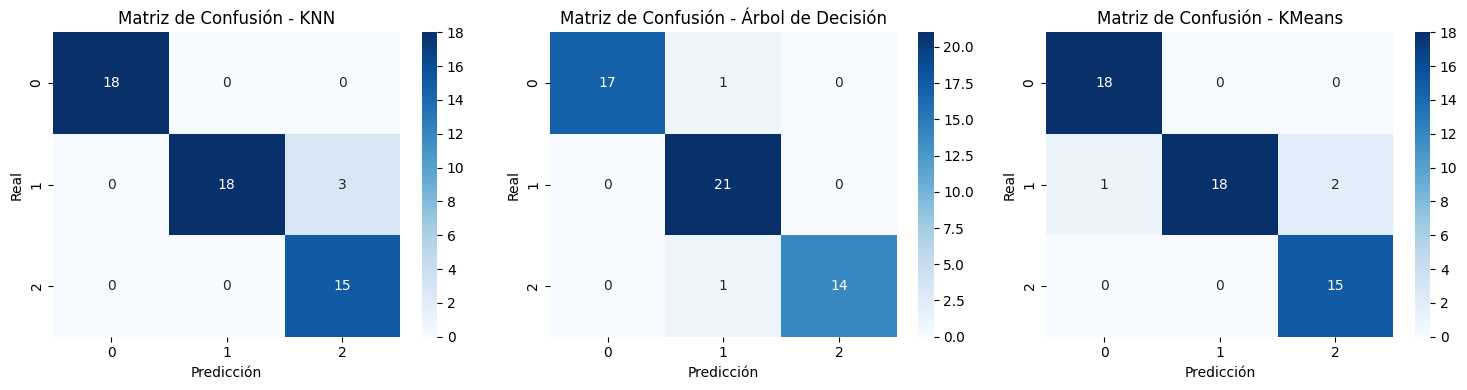

In [29]:
# ---------------------------------------------------------
# 7. MATRICES DE CONFUSIÓN
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, cm, title in zip(
    axes,
    [cm_knn, cm_tree, cm_kmeans],
    ["KNN", "Árbol de Decisión", "KMeans"]
):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Matriz de Confusión - {title}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

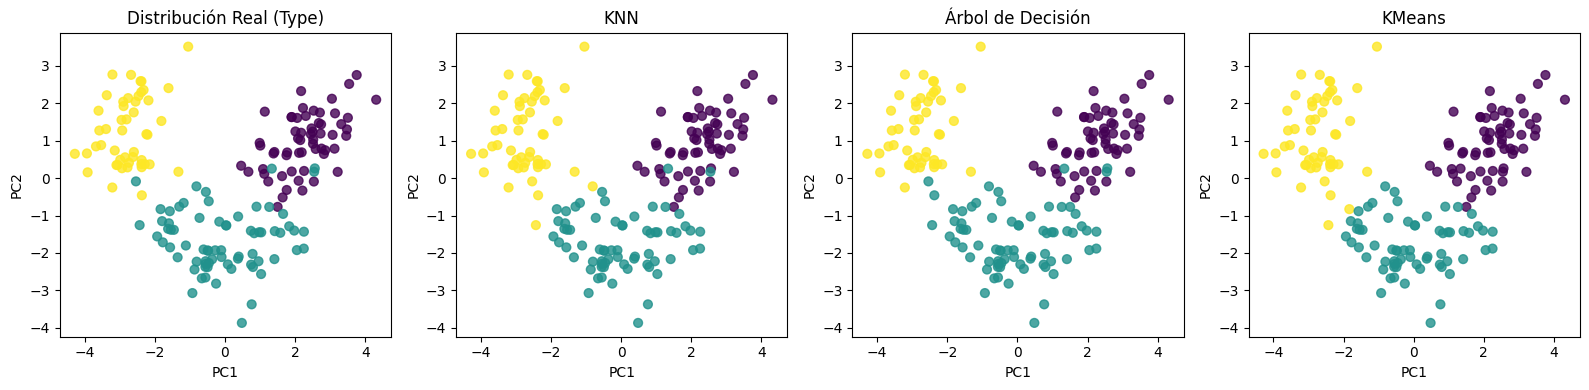

In [31]:
# ---------------------------------------------------------
# 8. DISPERSIÓN PCA PARA VISUALIZAR LOS GRUPOS Y MODELOS
# ---------------------------------------------------------

# Escalamos todo el conjunto completo para visualizar
X_scaled = scaler.fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Predicciones completas para todos los puntos (usando los modelos ya entrenados)
y_pred_knn_all = knn.predict(scaler.transform(X))
y_pred_tree_all = tree.predict(X)
y_pred_kmeans_all = kmeans.predict(scaler.transform(X))

# Mapeamos los clusters de KMeans a las clases mayoritarias
cluster_to_class_all = (
    pd.DataFrame({'cluster': kmeans.labels_, 'true': y_train})
    .groupby('cluster')['true']
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)
y_pred_kmeans_all_mapped = [cluster_to_class_all.get(c, -1) for c in y_pred_kmeans_all]

# Gráficos de dispersión comparativos
titles = ["Distribución Real (Type)", "KNN", "Árbol de Decisión", "KMeans"]
predictions = [y, y_pred_knn_all, y_pred_tree_all, y_pred_kmeans_all_mapped]

plt.figure(figsize=(16, 4))
for i, (title, preds) in enumerate(zip(titles, predictions)):
    plt.subplot(1, 4, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='viridis', s=40, alpha=0.8)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()